In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
color_pal=sns.color_palette()
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, WindowAverage, SeasonalWindowAverage,HistoricAverage

C:\Users\Maaz\anaconda3\lib\site-packages\statsforecast\core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
df=pd.read_csv('product b_basemodel.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_b= df.drop(['Product Name','Product Category','Month','Year'],axis=1)

In [4]:
sales_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales         60 non-null     int64  
 1   SMA_12months  48 non-null     float64
 2   SMA_6months   54 non-null     float64
 3   SMA_3months   57 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.3 KB


In [5]:
sales_b.head()

,Sales,SMA_12months,SMA_6months,SMA_3months
Month-Year,,,,
2019-01-01,494357,NaN,NaN,NaN
2019-02-01,837207,NaN,NaN,NaN
2019-03-01,1278271,NaN,NaN,NaN
2019-04-01,675985,NaN,NaN,869945.0
2019-05-01,757687,NaN,NaN,930488.0


<Axes: title={'center': 'Product B'}, xlabel='Month-Year'>

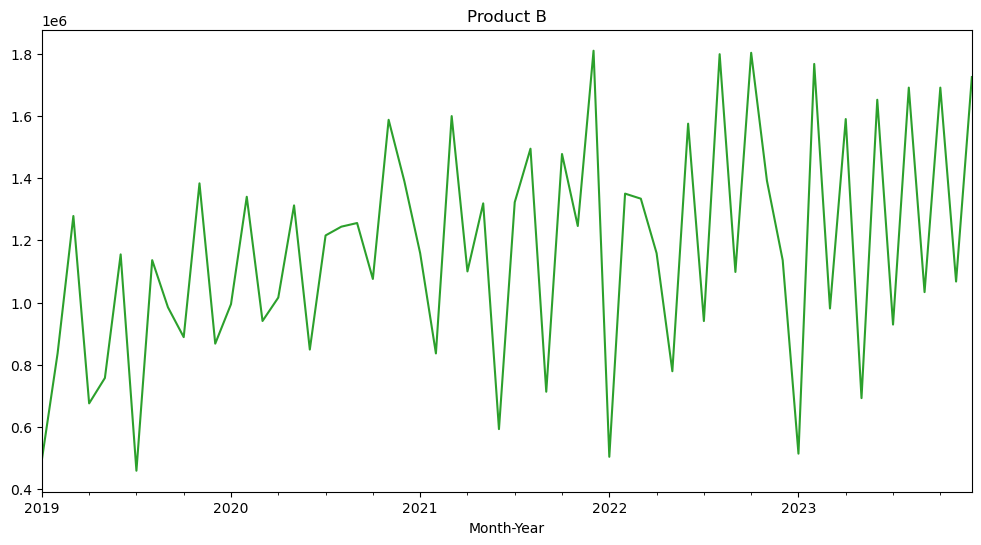

In [6]:
sales_b['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product B')

In [7]:
test_3= sales_b['Sales'].iloc[57:]
test_6=sales_b['Sales'].iloc[54:]
test_12=sales_b['Sales'].iloc[48:]

In [8]:
pred_3=sales_b['SMA_3months'].iloc[57:]
pred_6=sales_b['SMA_6months'].iloc[54:]
pred_12=sales_b['SMA_12months'].iloc[48:]

In [9]:
mae_3= mean_absolute_error(test_3,pred_3)
mse_3=mean_squared_error(test_3,pred_3)
mape_3= mean_absolute_percentage_error(test_3,pred_3)
rmse_3= np.sqrt(mean_squared_error(test_3,pred_3))

print(f'MAE - Simple Moving Averages_3 months: {mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 418635.667
MAPE - Simple Moving Averages_3 months: 0.274
MSE - Simple Moving Averages_3 months: 190730170926.333
RMSE - Simple Moving Averages_3 months: 436726.655


In [10]:
mae_6= mean_absolute_error(test_6,pred_6)
mse_6=mean_squared_error(test_6,pred_6)
mape_6= mean_absolute_percentage_error(test_6,pred_6)
rmse_6= np.sqrt(mean_squared_error(test_6,pred_6))

print(f'MAE - Simple Moving Averages_6 months: {mae_6:0.3f}')
print(f'MAPE - Simple Moving Averages_6 months: {mape_6:0.3f}')
print(f'MSE - Simple Moving Averages_6 months: {mse_6:0.3f}')
print(f'RMSE - Simple Moving Averages_6 months: {rmse_6:0.3f}')

MAE - Simple Moving Averages_6 months: 304964.833
MAPE - Simple Moving Averages_6 months: 0.224
MSE - Simple Moving Averages_6 months: 102700692602.500
RMSE - Simple Moving Averages_6 months: 320469.488


In [11]:
mae_12= mean_absolute_error(test_12,pred_12)
mse_12=mean_squared_error(test_12,pred_12)
mape_12= mean_absolute_percentage_error(test_12,pred_12)
rmse_12= np.sqrt(mean_squared_error(test_12,pred_12))

print(f'MAE - Simple Moving Averages_12 months: {mae_12:0.3f}')
print(f'MAPE - Simple Moving Averages_12 months: {mape_12:0.3f}')
print(f'MSE - Simple Moving Averages_12 months: {mse_12:0.3f}')
print(f'RMSE - Simple Moving Averages_12 months: {rmse_12:0.3f}')

MAE - Simple Moving Averages_12 months: 395910.333
MAPE - Simple Moving Averages_12 months: 0.402
MSE - Simple Moving Averages_12 months: 175742145660.833
RMSE - Simple Moving Averages_12 months: 419216.109


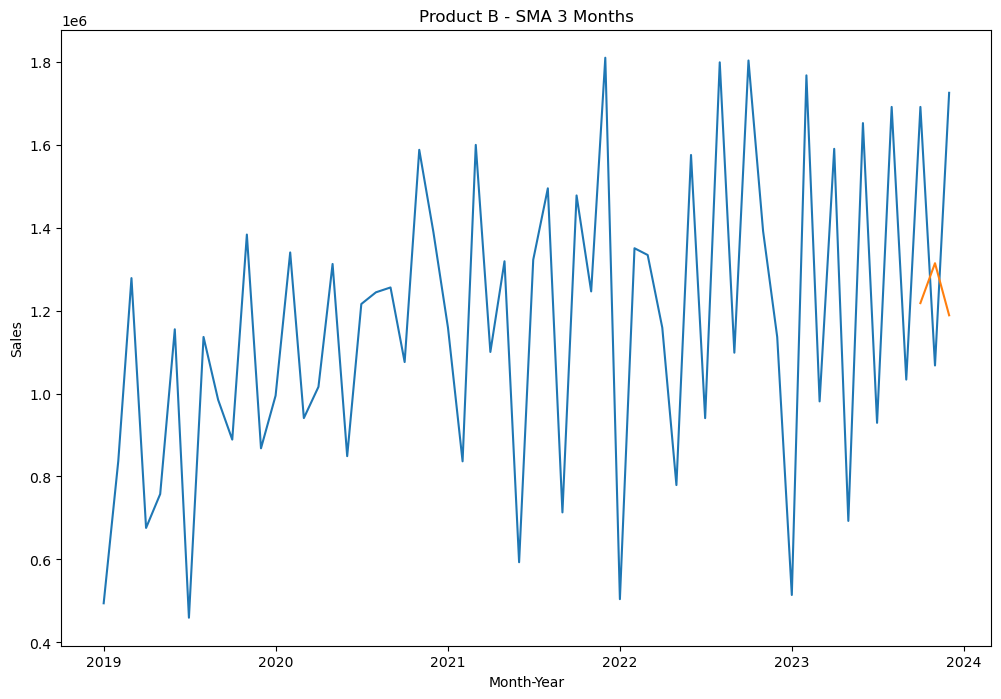

In [12]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b['Sales'])
sns.lineplot(pred_3)
plt.title('Product B - SMA 3 Months')
plt.show()

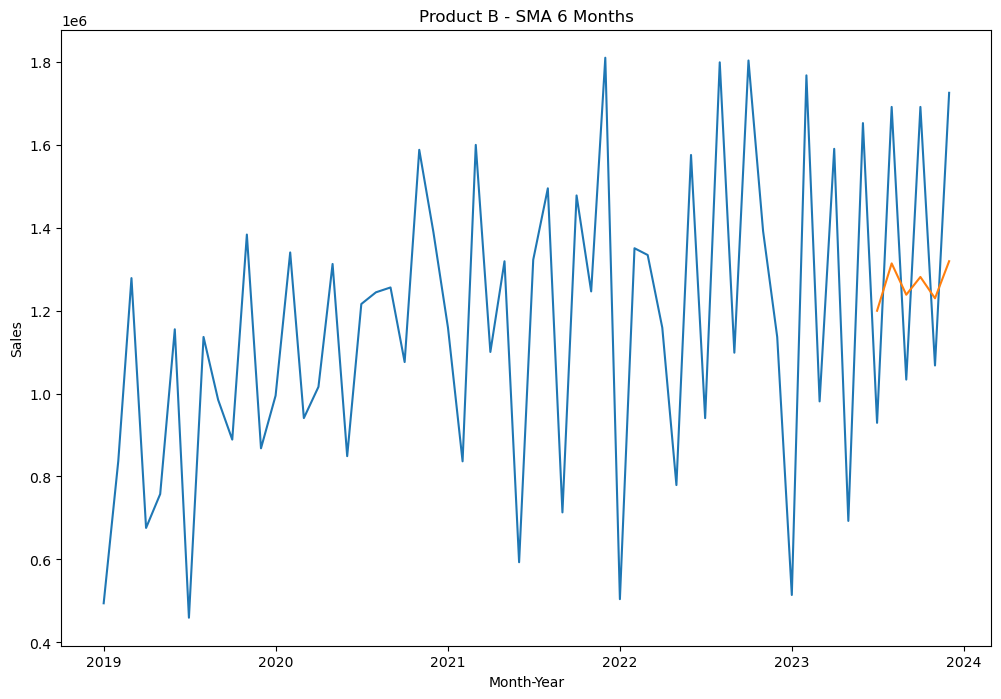

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b['Sales'])
sns.lineplot(pred_6)
plt.title('Product B - SMA 6 Months')
plt.show()

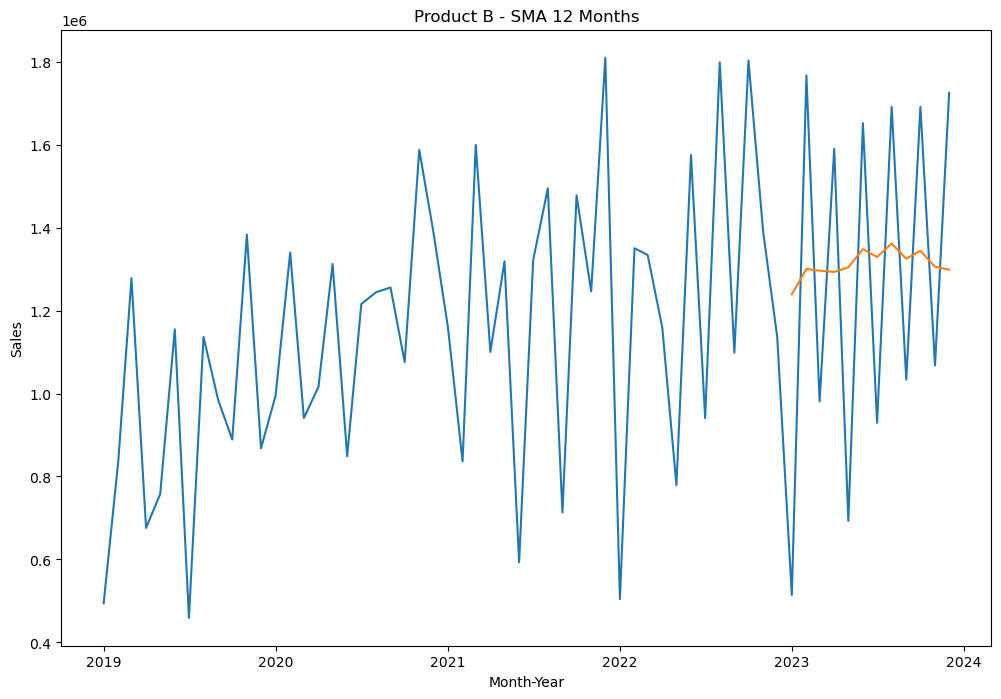

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b['Sales'])
sns.lineplot(pred_12)
plt.title('Product B - SMA 12 Months')
plt.show()

In [15]:
SALES_B=  df.drop(['Product Name','Product Category','Month','Year', 'SMA_12months','SMA_6months','SMA_3months'],axis=1)

In [16]:
TRAIN=SALES_B[:48]

In [17]:
TRAIN

,Sales
Month-Year,
2019-01-01,494357
2019-02-01,837207
2019-03-01,1278271
2019-04-01,675985
2019-05-01,757687
2019-06-01,1154891
2019-07-01,459535
2019-08-01,1136386
2019-09-01,984890


In [18]:
# Calculate the 12-month moving average for the last 12 months
sma_12 = TRAIN.rolling(window=12).mean().iloc[-1]

In [19]:
sma_12

Sales    1.239169e+06
Name: 2022-12-01 00:00:00, dtype: float64

In [20]:
# Initialize a list to hold your predictions
predictions = [sma_12]

In [21]:
# Generate predictions for the next 12 months
for i in range(11):
    # Add the most recent prediction to the sales data
    TRAIN= TRAIN.append(predictions[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions.append(TRAIN.rolling(window=12).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions = np.array(predictions)

# Print the predictions
print(predictions)

[[1239169.16666667]
 [1300409.68055556]
 [1296257.15393519]
 [1293116.83342978]
 [1304315.2362156 ]
 [1348065.00590023]
 [1329145.00639192]
 [1361519.75692458]
 [1325109.65333496]
 [1343998.70777954]
 [1305758.18342784]
 [1298590.19871349]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\3772613265.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\3772613265.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\3772613265.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\3772613265.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804

In [22]:
TEST=SALES_B[48:]

In [23]:
TEST['Predictions']=predictions

C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\1893014185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST['Predictions']=predictions


In [24]:
_mae_12= mean_absolute_error(TEST['Sales'],TEST['Predictions'])
_mse_12=mean_squared_error(TEST['Sales'],TEST['Predictions'])
_mape_12= mean_absolute_percentage_error(TEST['Sales'],TEST['Predictions'])
_rmse_12= np.sqrt(mean_squared_error(TEST['Sales'],TEST['Predictions']))

print(f'MAE - Moving Averages_12 months: {_mae_12:0.3f}')
print(f'MAPE - Moving Averages_12 months: {_mape_12:0.3f}')
print(f'MSE - Moving Averages_12 months: {_mse_12:0.3f}')
print(f'RMSE - Moving Averages_12 months: {_rmse_12:0.3f}')

MAE - Moving Averages_12 months: 395910.435
MAPE - Moving Averages_12 months: 0.402
MSE - Moving Averages_12 months: 175742237724.336
RMSE - Moving Averages_12 months: 419216.218


In [27]:
TRAIN_6=SALES_B[:54]

# Calculate the 6-month moving average for the last 6 months
sma_6 = TRAIN_6.rolling(window=6).mean().iloc[-1]

In [28]:
# Initialize a list to hold your predictions
predictions_6 = [sma_6]

# Generate predictions for the next 6 months
for i in range(5):
    # Add the most recent prediction to the sales data
    TRAIN_6= TRAIN_6.append(predictions_6[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions_6.append(TRAIN_6.rolling(window=6).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions_6 = np.array(predictions_6)

# Print the predictions
print(predictions_6)

[[1199531.66666667]
 [1313725.44444444]
 [1238173.18518519]
 [1281031.04938272]
 [1229551.05761317]
 [1318992.06721536]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\3003474456.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\3003474456.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\3003474456.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\3003474456.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Lo

In [30]:
TEST_6=SALES_B[54:]
TEST_6['Predictions_6']=predictions_6

C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\3452585520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_6['Predictions_6']=predictions_6


In [31]:
_mae_6= mean_absolute_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_mse_6=mean_squared_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_mape_6= mean_absolute_percentage_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_rmse_6= np.sqrt(mean_squared_error(TEST_6['Sales'],TEST_6['Predictions_6']))

print(f'MAE - Moving Averages_6 months: {_mae_6:0.3f}')
print(f'MAPE - Moving Averages_6 months: {_mape_6:0.3f}')
print(f'MSE - Moving Averages_6 months: {_mse_6:0.3f}')
print(f'RMSE - Moving Averages_6 months: {_rmse_6:0.3f}')

MAE - Moving Averages_6 months: 304964.725
MAPE - Moving Averages_6 months: 0.224
MSE - Moving Averages_6 months: 102700606589.380
RMSE - Moving Averages_6 months: 320469.354


In [32]:
TRAIN_3=SALES_B[:57]

# Calculate the 3-month moving average for the last 3 months
sma_3 = TRAIN_3.rolling(window=3).mean().iloc[-1]

In [33]:
# Initialize a list to hold your predictions
predictions_3 = [sma_3]

# Generate predictions 
for i in range(2):
    # Add the most recent prediction to the sales data
    TRAIN_3= TRAIN_3.append(predictions_3[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions_3.append(TRAIN_3.rolling(window=3).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions_3 = np.array(predictions_3)

# Print the predictions
print(predictions_3)

[[1217965.33333333]
 [1314176.11111111]
 [1188585.48148148]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\3984739376.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_3= TRAIN_3.append(predictions_3[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\3984739376.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_3= TRAIN_3.append(predictions_3[-1])


In [34]:
TEST_3=SALES_B[57:]
TEST_3['Predictions_3']=predictions_3

C:\Users\Maaz\AppData\Local\Temp\ipykernel_38804\1908527708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_3['Predictions_3']=predictions_3


In [35]:
_mae_3= mean_absolute_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_mse_3=mean_squared_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_mape_3= mean_absolute_percentage_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_rmse_3= np.sqrt(mean_squared_error(TEST_3['Sales'],TEST_3['Predictions_3']))

print(f'MAE - Simple Moving Averages_3 months: {_mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {_mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {_mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {_rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 418635.432
MAPE - Simple Moving Averages_3 months: 0.274
MSE - Simple Moving Averages_3 months: 190729911916.995
RMSE - Simple Moving Averages_3 months: 436726.358
